# Symulator kolejki M/M/C
## Projekt
Statystyka i teoria obsługi masowej.

Informatyka, stopień II, semestr I.

Grupa projektowa:
- Artur Bednarczyk

Projekt przygotowany w języku `Python`, dokumentacja utworzona w `Jupyter Lab`. W folderze `src` znajdują się pliki źródłowe, a w `example_results` przykładowe wynik, nie są to wyniki wykorzystane w tym dokumencie.

Całość, razem z plikiem `.ipynb` dostępna w repozytorium:

Repozytorium Github: [https://github.com/Isur/queue-simulator/](https://github.com/Isur/queue-simulator/)
## Teoria
### Notacja Kendala
Notacja zaproponowana przez Davida G. Kednalla w 1953 roku dotyczy opisów systemów kolejkowych. Wygląda ona w następujący sposób:

**A/B/c/L/N**, gdzie kolejne składowe oznaczają:
- A - rozkład zmiennej losowej określającej czas między kolejnymi zgłoszeniami
- B - rozkład zmiennej losowej określającej czas obsługi zgłoszenia
- c - liczba równoległych stanowisk obsługujących zgłoszenia
- L - bufor, rozmiar kolejki (domyślnie - nieskończona)
- N - wymiar źródła zgłoszeń (domyślnie - nieskończone) 

### M/M/C
Zgodnie z notacją Kendalla system kolejkowy M/M/C to system z czasem miedzy kolejnymi zgłoszeniami o rozkładzie wykładniczym, czasem obsługi zgłoszeń o rozkłądzie wykładniczym oraz `c` równoległych statowiskach obsługi. Kolejka nie jest ograniczona.
## Symulator
### Opis
Celem symulatora jest wykonanie dużej liczby symulacji kolejki. W tym celu została przygotowana klasa tworząca testy o losowych parametrach z wyznaczonego przedziału a następnie wykonująca symulacje wykorzystując wszystkie dostępne rdzenie procesora urządzenia na którym zostaje uruchomiona. W wyniku działania otrzymujemy plik o rozszerzeniu `.csv`, który zawiera wyniki z wszystkich symulacji. Kolejne kolumny to:
- Total Customers - liczba wszystkich zgłoszeń w systemie
- Serviced Customers - liczba obsłużonych zgłoszeń
- Not Serviced Customers - liczba nieobsłużonych zgłoszeń
- Service Mean Time - średni czas obsługi
- Service Rate - ustawione tempo obsługi
- Arrival Rate - ustawione tempo napływu zgłoszeń
- Servers Number - liczba stanowisk obsługi - serwerów
- Time Limit - limit czasowy
- Delay probability - obliczone prawdopodobieństwo opóźńienia
- System load - obliczone obciążenie systemu
- Average Customers - obliczona średnia liczba zgłoszeń w systemie
- Mean Service Time - obliczony średni czas obsługi
- Average Time In System - obliczony średni czas przebywania zgłoszenia w systemie

Wymienione kolumny to wyniki z symulacji komputerowej, ustawienia danej symulacji oraz wyniki z teoretycznego modelu dla danych ustawień.
Po za wynikiem ogólny zostaje również zapisane kilka całych procesów z symulacji. Wyniki takie zawierają ustawienia użyte w danej symulacji oraz cały przebieg procesu.
Wartości teoretyczne są obliczane tylko gdy dany process posiada stan stacjonarny. 
### Przykład użycia
Ten przykład zostanie wykorzystany do dalszej analizy. Zostanie wykonane 1 000 000 symulacji z losowymi ustawieniami.

In [1]:
from time import time
from main import Tester
tester = Tester(1000000)
tester.prepare_tests()
start_time = time()
tester.run_multi_process()
end_time = time()
tester.print_results(end_time - start_time)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Number of tests: 1000000
CPU Process number: 4
Number of tests processed by each process:
[250000, 250000, 250000, 250000]
Progress bar might by little jumpy cause of multiprocessing


  0%|          | 0/1000000 [40:17<?, ?it/s]0, 353.43it/s]  



Tested in 2417.381683588028s
Results saved to file '../results/results.csv'


Ustawienia są losowane dla każdego testu, tempo napływu z przedziału 4 - 10, tempo obsługi z przedziału 2 - 8 oraz liczba serwerów 2 - 6. Natomiast czas określony dla danego testu jest wzorem: `10 * (i % 10 + 1)`, gdzie `i` oznacza i-ty test.

Dla powyższego testu wyniki wyglądają następująco:

In [2]:
import pandas as pd

dataset = pd.read_csv("../results/result.csv", delimiter=";")
print("Kolumny:")
for col in dataset.columns:
    print(col, end=" | ")
print("\n\n")
print(dataset)

Kolumny:
Total Customers | Serviced Customers | Not Serviced Customers | Service Mean Time | Service Rate | Arrival Rate | Servers Number | Time Limit | Delay probability | System load | Average Customers | Mean Service Time | Average Time In System | 


        Total Customers  Serviced Customers  Not Serviced Customers  \
0                    53                  49                       4   
1                   119                 112                       7   
2                   258                 254                       4   
3                   326                 324                       2   
4                   495                 494                       1   
...                 ...                 ...                     ...   
999995              309                 309                       0   
999996              533                 527                       6   
999997              308                 308                       0   
999998              696            

In [3]:
process = pd.read_csv("../results/process-0.csv", delimiter=";")
print(process)

       Time    Event  Server id  Customer id  Customers in system
0    0.0000  ARRIVAL        NaN            0                    1
1    0.0000  SERVICE        1.0            0                    1
2    0.1331  ARRIVAL        NaN            1                    2
3    0.1331  SERVICE        4.0            1                    2
4    0.1718  ARRIVAL        NaN            2                    3
..      ...      ...        ...          ...                  ...
150  9.7985  ARRIVAL        NaN           51                    4
151  9.7985  SERVICE        4.0           51                    4
152  9.8506  ARRIVAL        NaN           52                    5
153  9.8506  SERVICE        3.0           52                    5
154  9.8831    LEAVE        0.0           49                    4

[155 rows x 5 columns]


In [4]:
with open("../results/process-0.txt", "r") as file:
    print(file.read())

Run with settings:
Service rate: 4.032654594983232
Arrival rate: 4.841696336581463
Number of servers: 6
Time limit: 10
  Time  Event      Server id    Customer id    Customers in system
------  -------  -----------  -------------  ---------------------
0       ARRIVAL                           0                      1
0       SERVICE            1              0                      1
0.1331  ARRIVAL                           1                      2
0.1331  SERVICE            4              1                      2
0.1718  ARRIVAL                           2                      3
0.1718  SERVICE            5              2                      3
0.2162  LEAVE              5              2                      2
0.2222  ARRIVAL                           3                      3
0.2222  SERVICE            3              3                      3
0.2752  LEAVE              1              0                      2
0.2922  ARRIVAL                           4                      3
0.2922  SE

Przygotowany został również graficzny interpreter powyższych wyników. Plik `.csv` zawierający proces może zostać wykorzystany do wyświetlenia wykresu przedstawiającego cały proces oraz wykresu przedstawiającego liczbę zgłoszeń występującą w systemie oraz jak wiele razy taka liczba wystąpiła.

Run with settings:
Service rate: 4.032654594983232
Arrival rate: 4.841696336581463
Number of servers: 6
Time limit: 10



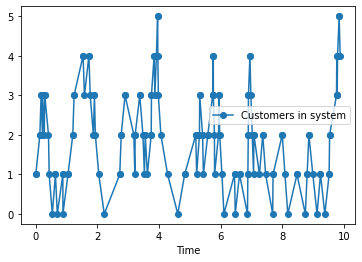

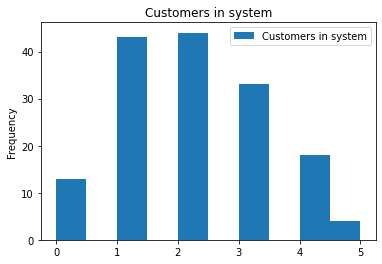

Run with settings:
Service rate: 2.9021522899278436
Arrival rate: 8.199319421875428
Number of servers: 3
Time limit: 10



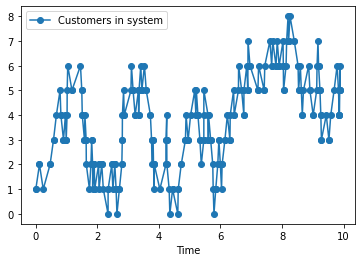

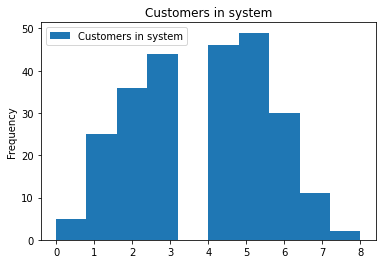

Run with settings:
Service rate: 7.011432916410547
Arrival rate: 8.755359571277623
Number of servers: 5
Time limit: 10



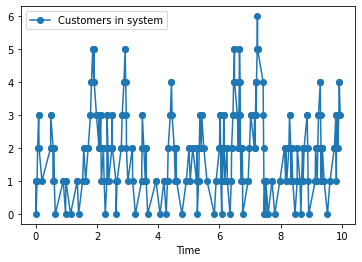

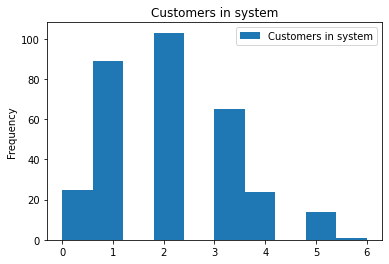

Run with settings:
Service rate: 2.470225179280164
Arrival rate: 7.7193507557679935
Number of servers: 6
Time limit: 10



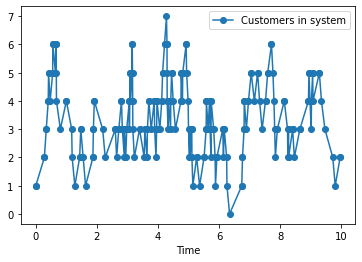

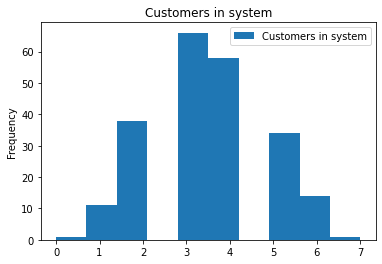

In [5]:
from resultAnalysis import Results
from matplotlib import pyplot as plt
import os

for i in range(os.cpu_count()): 
    Results().plot_process_from_file(f'../results/process-{i}')
    plt.show()

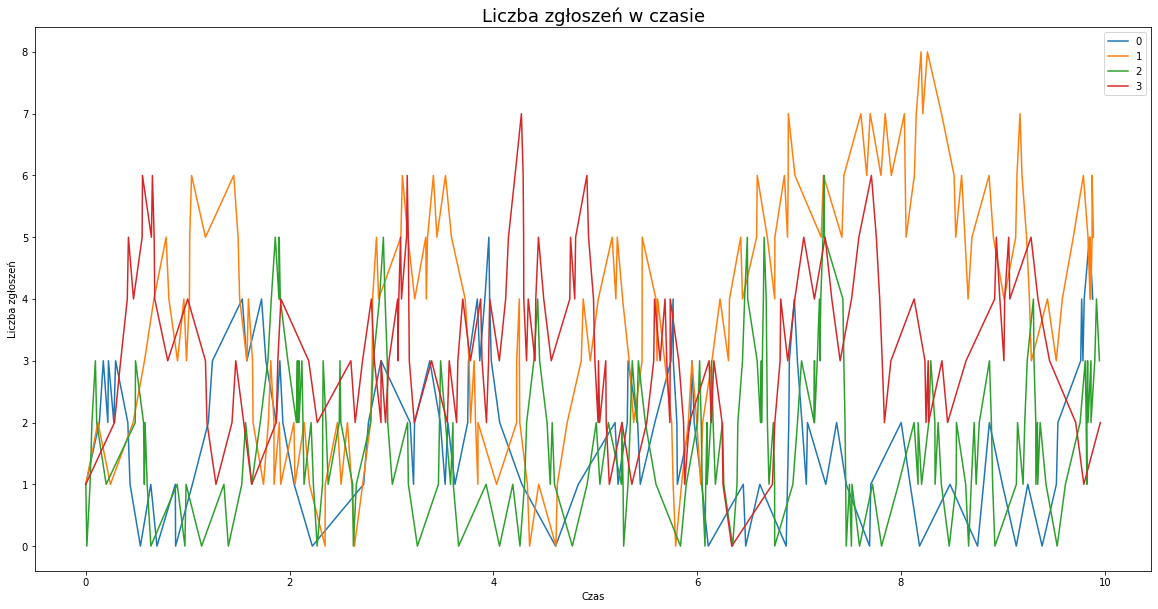

In [6]:
plt.figure(figsize=(20,10))
plt.title("Liczba zgłoszeń w czasie", fontsize=18)
for i in range(os.cpu_count()): 
    d = pd.read_csv(f"../results/process-{i}" + ".csv", delimiter=';')
    plt.plot(d['Time'], d['Customers in system'], label=i)
plt.xlabel("Czas")
plt.legend()
plt.ylabel("Liczba zgłoszeń")

plt.show()

## Wywołanie jednego testu

In [7]:
import time
from Simulator import MMC
from Utils import Utils
from CalcModel import CalcModel


start = time.time()
# service rate | arrival rate | servers | time limit
service_rate = 3
arrival_rate = 5
servers = 2
time_limit = 3

print(f"Ustawienia symulacji: \n Tempo obsługi: {service_rate} \n Tempo napływu: {arrival_rate} \n Liczba serwerów: {servers} \n Limit czasu: {time_limit}")
model = MMC([service_rate,arrival_rate,servers,time_limit])
total, serviced, not_serviced, mean, process = model.run(4)
print(f"Całkowita liczba zgłoszeń: {total}")
print(f"Obsłużone: {serviced}")
print(f"Nie obsłużone: {not_serviced}")
print(f"Średni czas obsługi: {mean}")
end = time.time()
print(f"Czas symulacji: {round(end - start, 4)}")
print("Proces:")
Utils.print_table(process, ["CZAS", "ZDARZENIE", "SERWER", "ZGŁOSZENIE", "LICZBA ZGŁOSZEŃ W SYSTEMIE"])
print("===========")
print("Matematyczny model dla tych ustawień")
print("===========")
model = CalcModel(service_rate,arrival_rate,servers,time_limit)
if model.system_load >= 1:
    print("Brak stanu stacjonarnego")
    print(f"Obiążenie: {model.system_load}")
else:
    print(f"Obciążenie: {model.system_load}")
    print(f"Prawdopodobieństwo wystąpienia 8 zgłoszeń: {model.probability_of_n_customers(8)}")
    print(f"Prawdopodobieństwo opóźnienia: {model.delay_probability()}")
    print(f"Średnia liczba zgłoszeń: {model.average_customers_in_queue()}")
    print(f"Średni czas w systemie = {model.average_time_in_system()}")
    print(f"Średni czas obsługi: {model.mean_service_time}")

Ustawienia symulacji: 
 Tempo obsługi: 3 
 Tempo napływu: 5 
 Liczba serwerów: 2 
 Limit czasu: 3
Całkowita liczba zgłoszeń: 14
Obsłużone: 11
Nie obsłużone: 3
Średni czas obsługi: 0.15486950185601903
Czas symulacji: 0.0172
Proces:
  CZAS  ZDARZENIE      SERWER    ZGŁOSZENIE    LICZBA ZGŁOSZEŃ W SYSTEMIE
------  -----------  --------  ------------  ----------------------------
0       ARRIVAL                           0                             1
0       SERVICE             0             0                             1
0.2242  ARRIVAL                           1                             2
0.2242  SERVICE             1             1                             2
0.2901  ARRIVAL                           2                             3
0.2908  LEAVE               0             0                             2
0.2909  SERVICE             0             2                             2
0.2921  ARRIVAL                           3                             3
0.4692  LEAVE               1

## Analiza Statystyczna

In [8]:
print(f"Liczba wykonanych testów: {len(dataset)}")

Liczba wykonanych testów: 1000000


### Przygotwanie danych
Sprawdzenie czy są braki w wartościach (brak stanu stacjonarnego). W przypadku wystąpienia braku, zostaną usunięte puste wiersze. Dodatkowo została dodana kolumna `load` określająca obiążenie jako niskie, średnie i wysokie (`low`, `medium`, `high`), które są w przedziałach odpowiednio, poniżej 0.4, poniżej 0.7 oraz pozostałe.

In [9]:
dataset['load'] = dataset['System load'].apply(lambda q: 'low' if q < 0.4 else 'medium' if q < 0.7 else 'high')

def show_nulls(dataset):
    Sum = dataset.isnull().sum()
    Percentage = (dataset.isnull().sum() / dataset.isnull().count())
    stat = pd.concat([Sum, Percentage], axis=1, keys=['Sum', 'Percentage'])
    print(stat)
    
show_nulls(dataset)

                          Sum  Percentage
Total Customers             0    0.000000
Serviced Customers          0    0.000000
Not Serviced Customers      0    0.000000
Service Mean Time           0    0.000000
Service Rate                0    0.000000
Arrival Rate                0    0.000000
Servers Number              0    0.000000
Time Limit                  0    0.000000
Delay probability       67795    0.067795
System load                 0    0.000000
Average Customers       67795    0.067795
Mean Service Time           0    0.000000
Average Time In System  67795    0.067795
load                        0    0.000000


In [10]:
db_prepared = dataset.dropna()
    
show_nulls(db_prepared)

print(f"\nLiczba testów po eliminacji wybrakowanych: {len(db_prepared)}")

                        Sum  Percentage
Total Customers           0         0.0
Serviced Customers        0         0.0
Not Serviced Customers    0         0.0
Service Mean Time         0         0.0
Service Rate              0         0.0
Arrival Rate              0         0.0
Servers Number            0         0.0
Time Limit                0         0.0
Delay probability         0         0.0
System load               0         0.0
Average Customers         0         0.0
Mean Service Time         0         0.0
Average Time In System    0         0.0
load                      0         0.0

Liczba testów po eliminacji wybrakowanych: 932205


### Statystyki

In [11]:
db_prepared.mean()

Total Customers           381.150759
Serviced Customers        378.590880
Not Serviced Customers      2.559879
Service Mean Time           0.219394
Service Rate                5.155769
Arrival Rate                6.913304
Servers Number              4.123830
Time Limit                 54.995886
Delay probability           0.106066
System load                 0.406979
Average Customers           1.523125
Mean Service Time           0.221012
Average Time In System      0.208468
dtype: float64

In [12]:
db_prepared.describe()

Total Customers  Serviced Customers  Not Serviced Customers  \
count    932205.000000       932205.000000           932205.000000   
mean        381.150759          378.590880                2.559879   
std         226.393762          225.810667                5.373805   
min          21.000000           19.000000                0.000000   
25%         193.000000          191.000000                1.000000   
50%         357.000000          355.000000                1.000000   
75%         534.000000          532.000000                3.000000   
max        1096.000000         1090.000000              176.000000   

       Service Mean Time   Service Rate   Arrival Rate  Servers Number  \
count      932205.000000  932205.000000  932205.000000   932205.000000   
mean            0.219394       5.155769       6.913304        4.123830   
std             0.088563       1.680779       1.723342        1.377708   
min             0.072900       2.000004       4.000000        2.000000   
25%             0.150800       3.749928       5.415967        3.000000   
50%             0.191100       5.201963       6.869258        4.000000   
75%             0.264800       6.600237       8.389022        5.000000   
max             0.749300       7.999996       9.999991        6.000000   

          Time Limit  Delay probability    System load  Average Customers  \
count  932205.000000      932205.000000  932205.000000      932205.000000   
mean       54.995886           0.106066       0.406979           1.523125   
std        28.719022           0.121910       0.208119         366.040599   
min        10.000000           0.000015       0.083595           0.000001   
25%        30.000000           0.009259       0.242030           0.003040   
50%        50.000000           0.054553       0.359362           0.031217   
75%        80.000000           0.167579       0.535499           0.192850   
max       100.000000           0.499999       0.999999      338848.832718   

       Mean Service Time  Average Time In System  
count      932205.000000            9.322050e+05  
mean            0.221012            2.084679e-01  
std             0.088450            4.868073e+01  
min             0.125000            3.323207e-07  
25%             0.151510            4.559120e-04  
50%             0.192235            4.577775e-03  
75%             0.266672            2.799898e-02  
max             0.499999            4.473859e+04

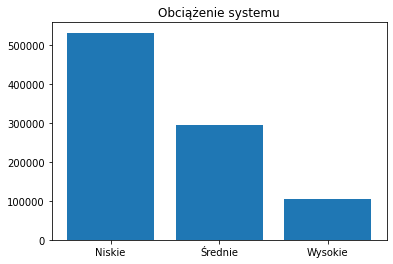

In [13]:
plt.bar(['Niskie', 'Średnie', 'Wysokie'], db_prepared.load.value_counts())
plt.title('Obciążenie systemu')
plt.show()

<BarContainer object of 5 artists>

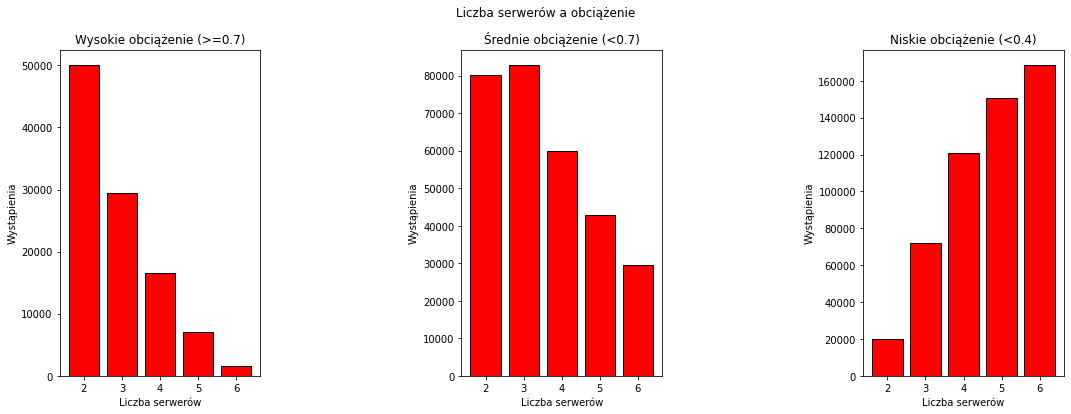

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Liczba serwerów a obciążenie")
fig.subplots_adjust(wspace=1)

ax[0].set_title("Wysokie obciążenie (>=0.7)")
ax[0].set_xlabel("Liczba serwerów")
ax[0].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'high'].value_counts()
x = (list(x.index), list(x.values))
ax[0].bar(x[0], x[1], color='red', edgecolor='black')

ax[1].set_title("Średnie obciążenie (<0.7)")
ax[1].set_xlabel("Liczba serwerów")
ax[1].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'medium'].value_counts()
x = (list(x.index), list(x.values))
ax[1].bar(x[0], x[1], color='red', edgecolor='black')

ax[2].set_title("Niskie obciążenie (<0.4)")
ax[2].set_xlabel("Liczba serwerów")
ax[2].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'low'].value_counts()
x = (list(x.index), list(x.values))
ax[2].bar(x[0], x[1], color='red', edgecolor='black')

### Korelacje
Poniżej mapa oraz wykresy przedstawiające korelacje między zmiennymi.

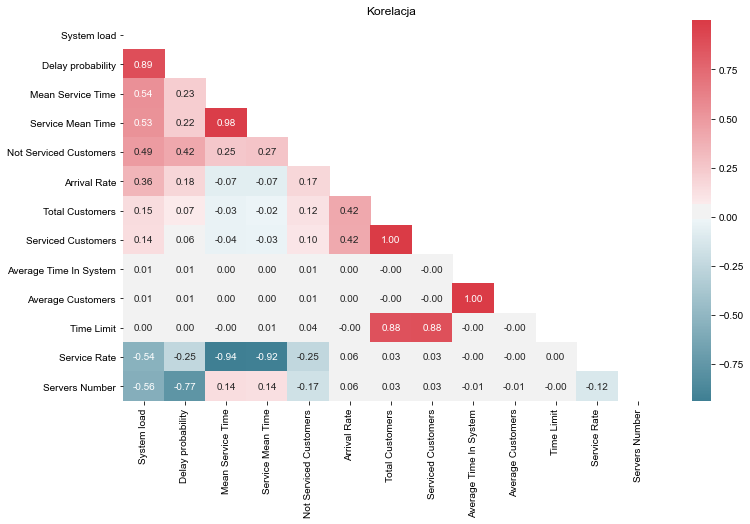

In [15]:
import numpy as np
import seaborn as sns

corr = db_prepared.corr()
top_corr_cols = corr['System load'].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
drop_self = np.zeros_like(top_corr)
drop_self[np.triu_indices_from(drop_self)] = True
plt.figure(figsize=(12, 7))
plt.title("Korelacja")
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f",
            mask=drop_self)
sns.set(font_scale=1.5)

Z **ustawień systemu** największy wpływ negatywny (mniejsza wartość) na obciążenie systemu ma `Servers Number`, czyli liczba serwerów, natomiast największy wpływ pozytywny ma tempo napływu.

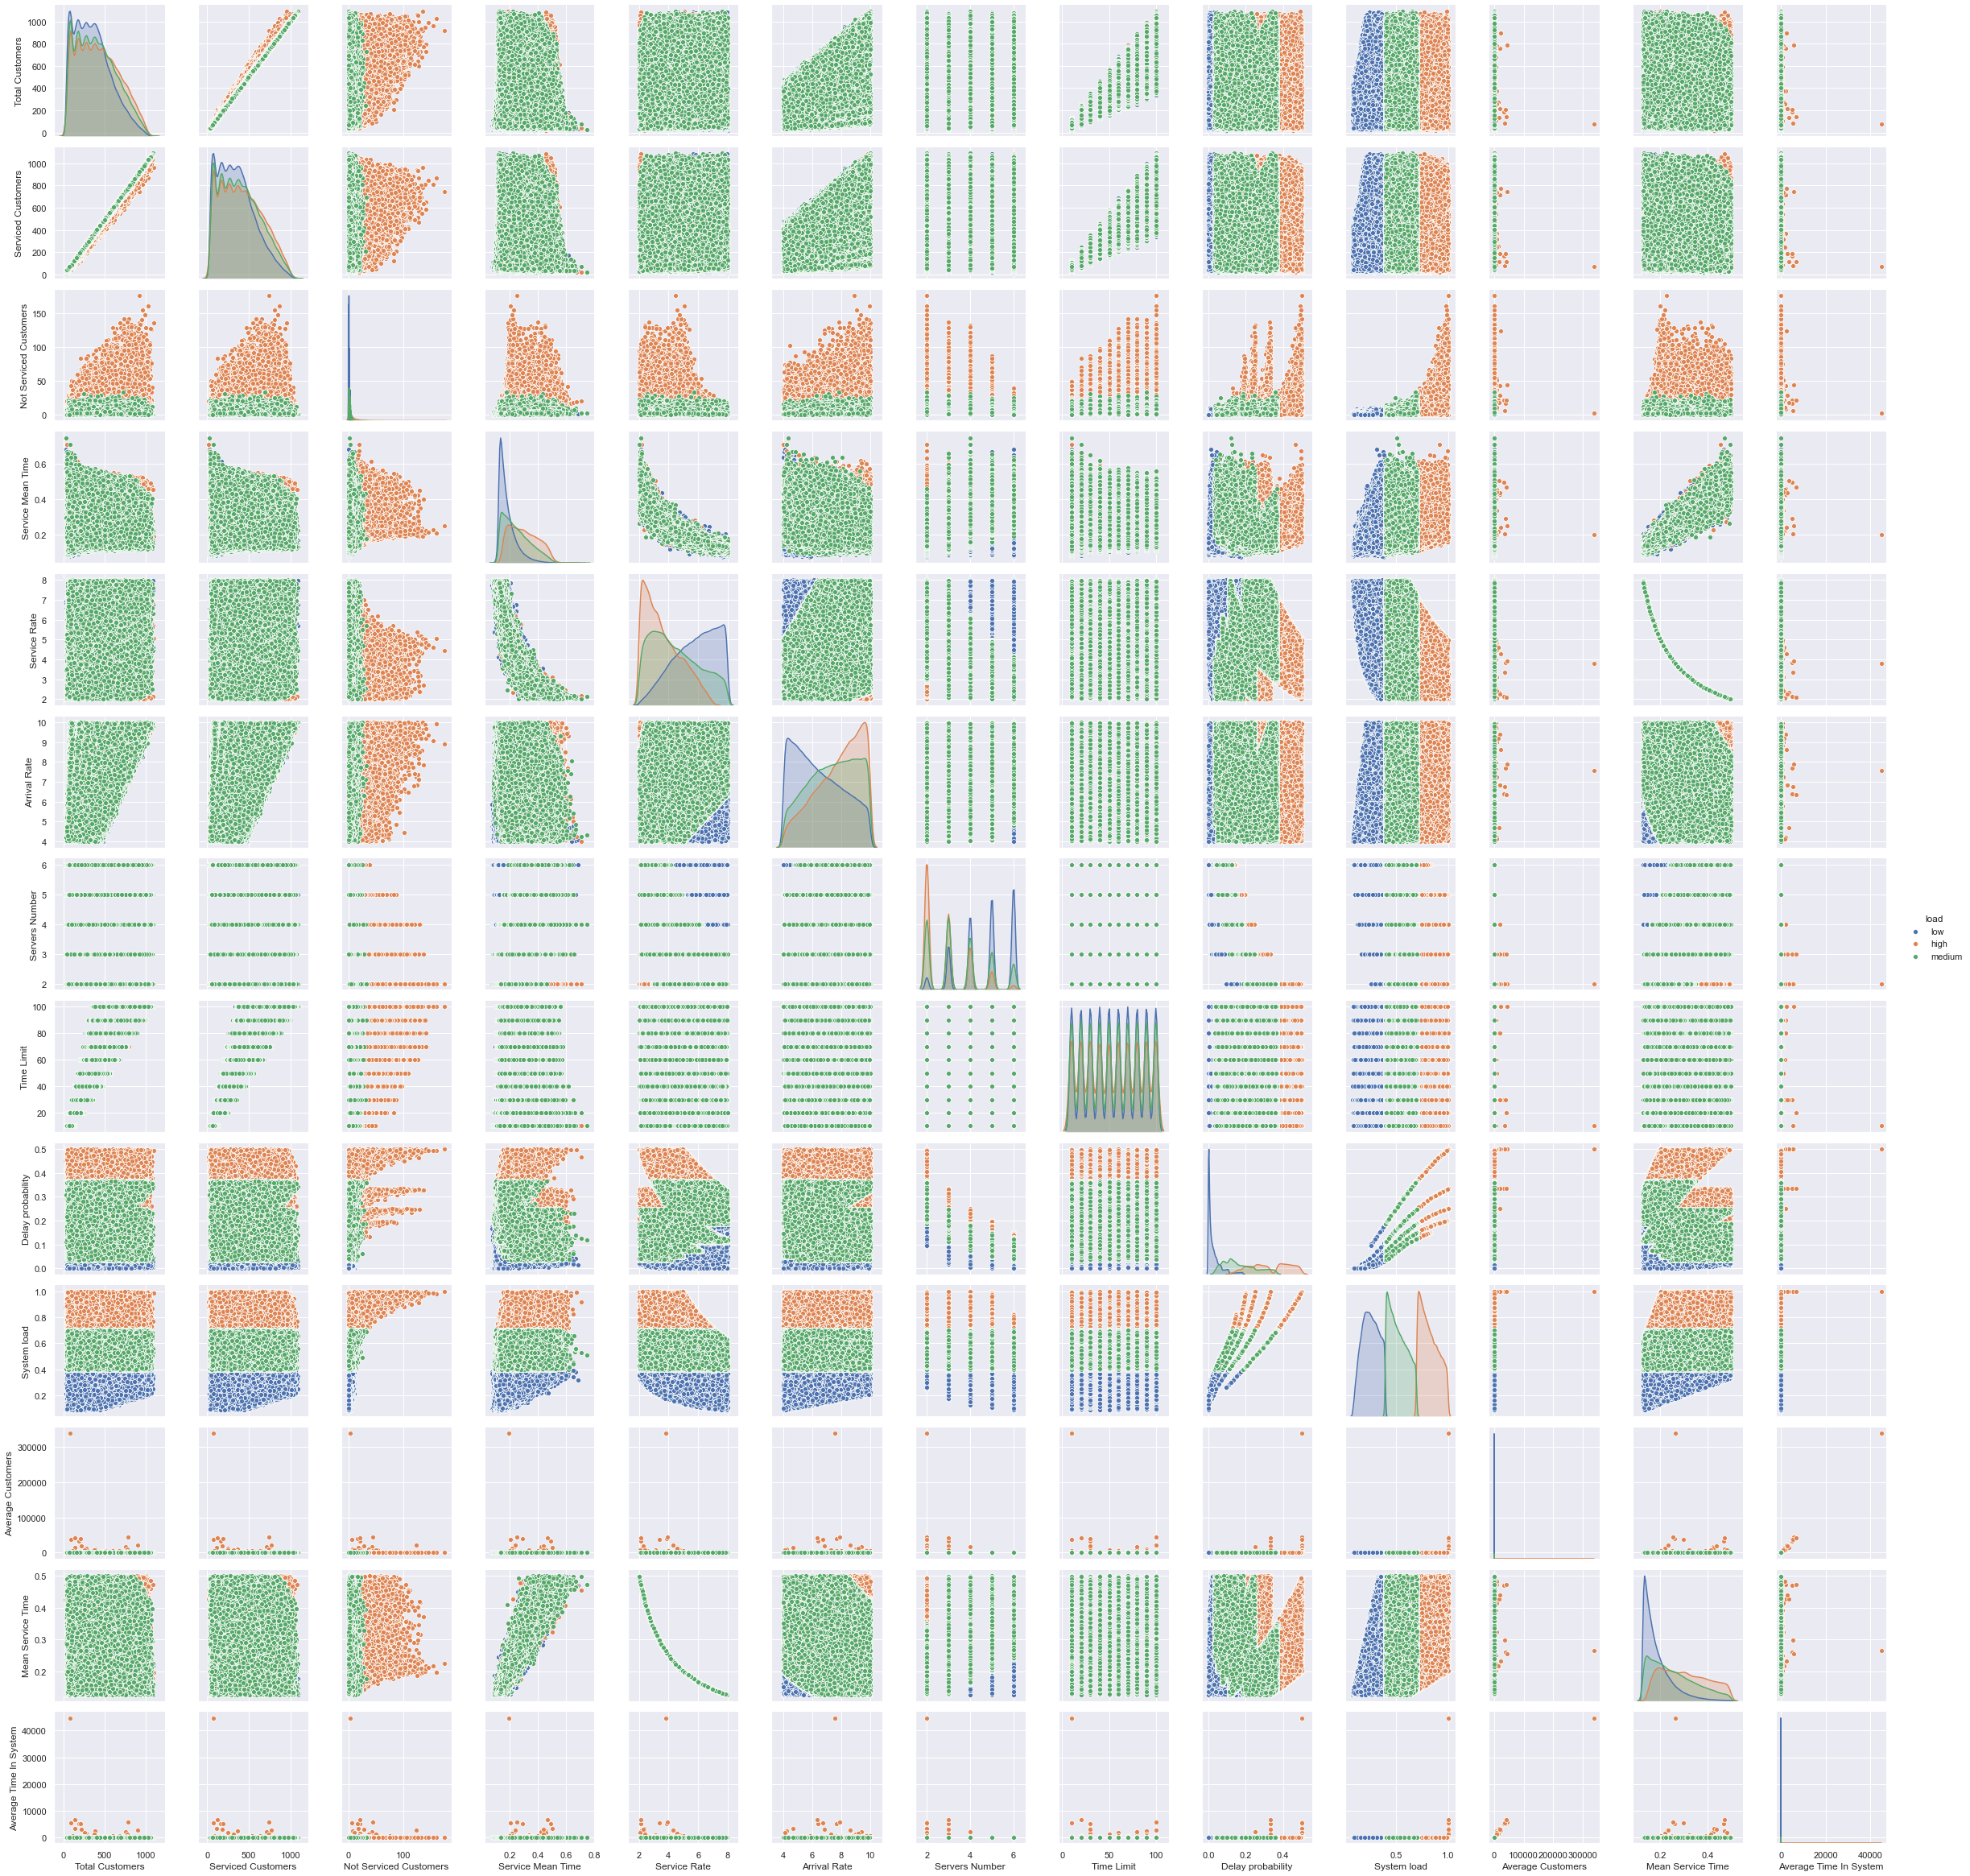

In [16]:
sns.set(font_scale=1.0)
cols = db_prepared.columns
g = sns.pairplot(data=db_prepared.loc[:, cols], hue='load')
fig = g.fig
fig.subplots_adjust(top=0.99, wspace=0.3)
plt.show()

### Obciążenie pry różnym tempie napływu i obsługi oraz liczbie serwerów

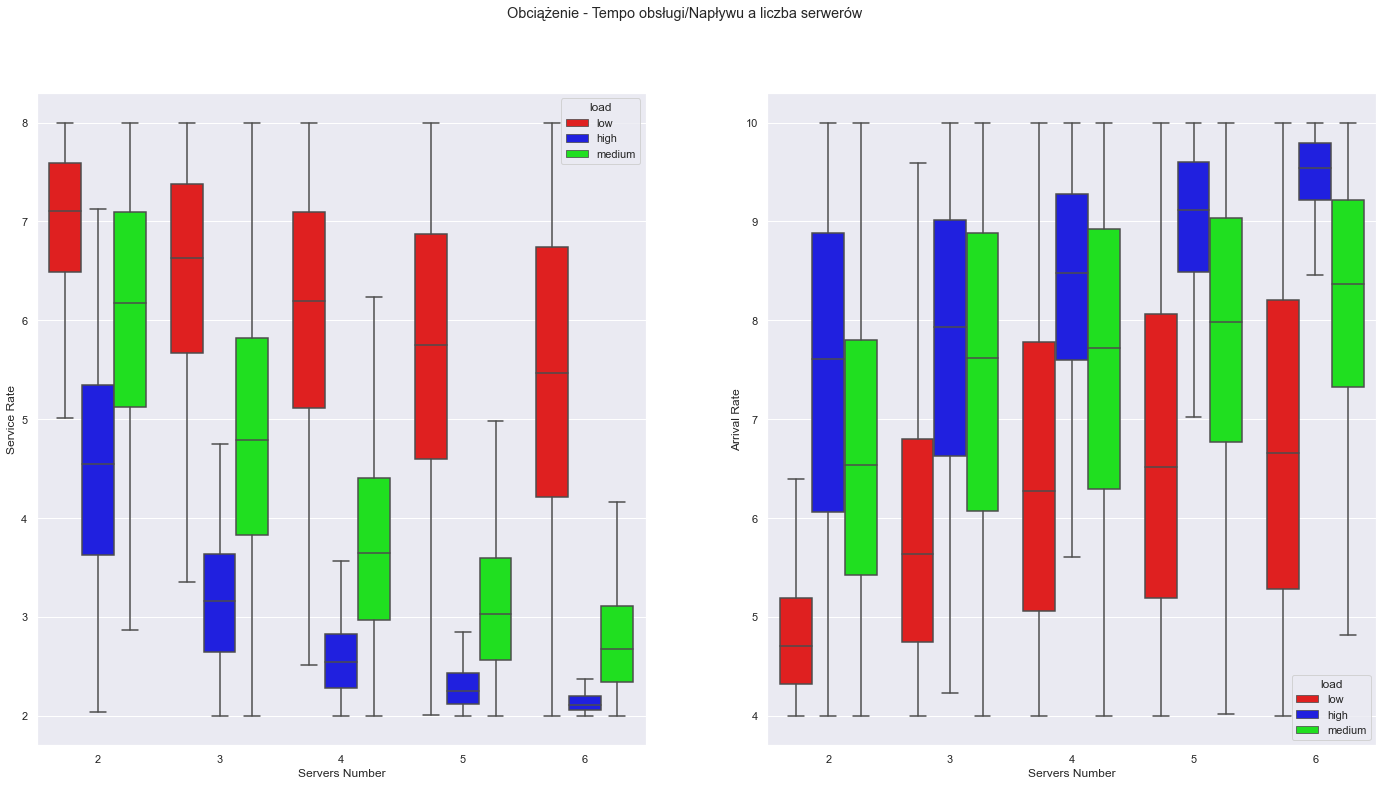

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(24,12))
fig.suptitle("Obciążenie - Tempo obsługi/Napływu a liczba serwerów")
sns.boxplot(y='Service Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[0],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[0].set_ylabel("Service Rate")
ax[0].set_xlabel("Servers Number")
sns.boxplot(y='Arrival Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[1],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[1].set_ylabel("Arrival Rate")
ax[1].set_xlabel("Servers Number")
plt.show()

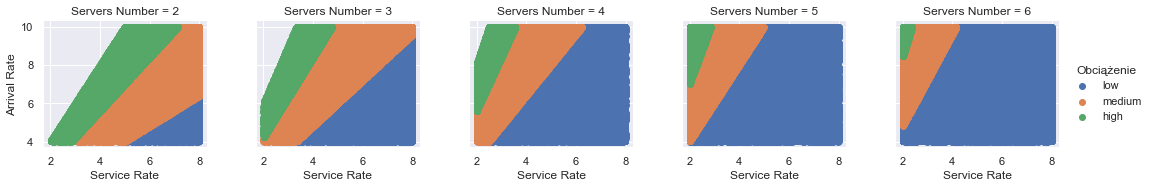

In [18]:
g = sns.FacetGrid(db_prepared, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'Service Rate', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

plt.show()

Jak widać na powyższych wykresach, im więcej serwerów tym więcej symulacji o niskim obciążeniu. Wyższe tempo napływu i niskie tempo obsługi to więszke obciążenie systemu.

### Różnica między modelem matematycznym a wynikiem symulacji - średni czas obłsugi

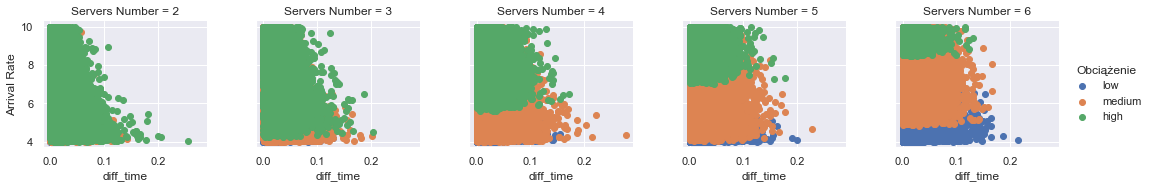

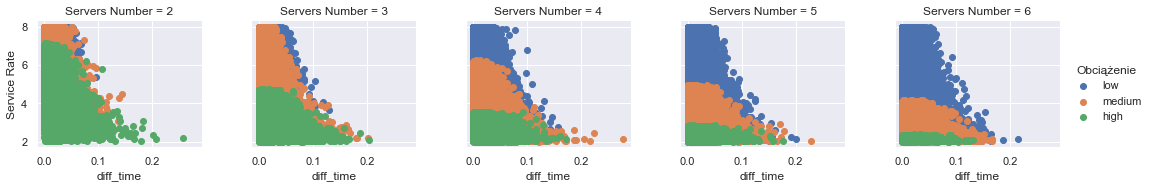

In [19]:
df = db_prepared.copy()
df['diff_time'] = abs(db_prepared['Service Mean Time'] - db_prepared['Mean Service Time'])
df['serviced_percent'] = (db_prepared['Serviced Customers'] / db_prepared['Total Customers']) * 100

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')



### Średni czas obsługi z symulacji i modelu

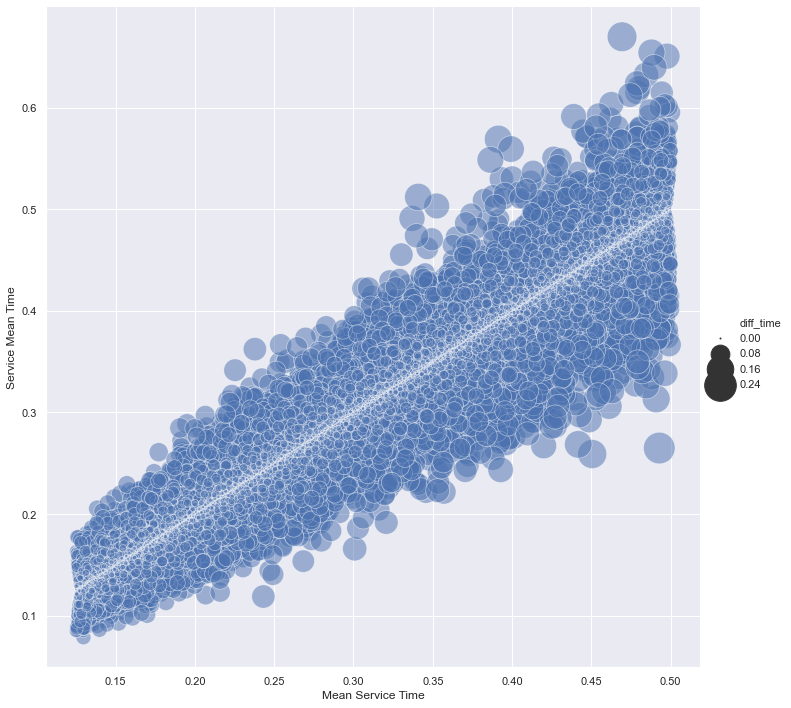

In [34]:
sns.relplot(x="Mean Service Time", y="Service Mean Time", size="diff_time",
            sizes=(1, 1000), alpha=.5,
            height=10, data=df.loc[df['Servers Number'] == 5])

### Różnica w procentowej wartości obsłużonych zgłoszeń

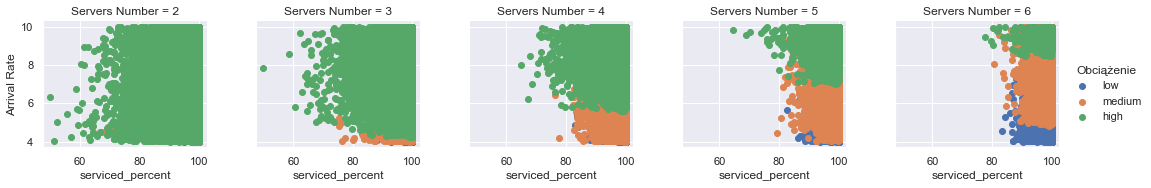

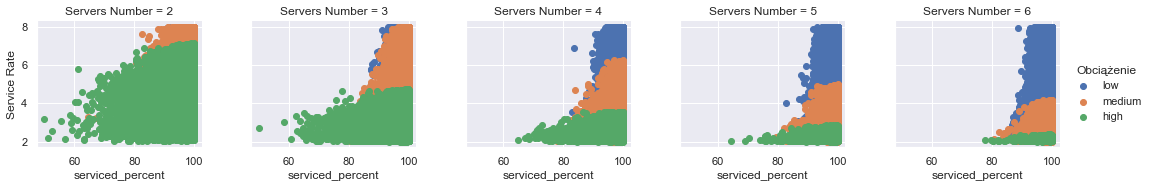

In [20]:
g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

## Regresja
Do kolejnych wykresów wykorzystano dla czytelności wykorzystano dane dla jednej lilczby serwerów.
### Tempo napływu i obsługi przy różnych obciążeniach

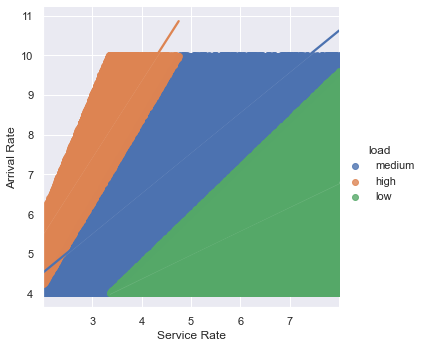

In [21]:
g = sns.lmplot(x='Service Rate', y='Arrival Rate', hue='load', data=db_prepared.loc[db_prepared['Servers Number'] == 3])

### Wpływ tempa napływu na obciążenie systemu

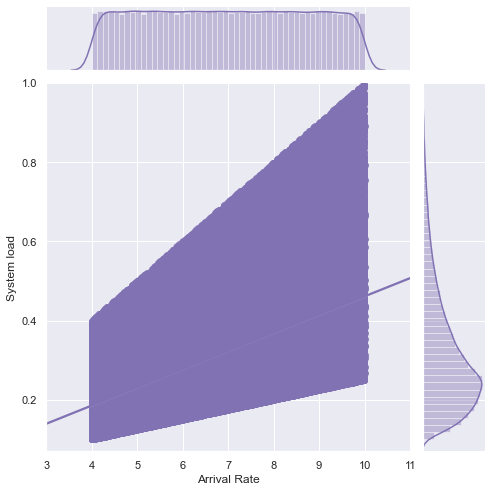

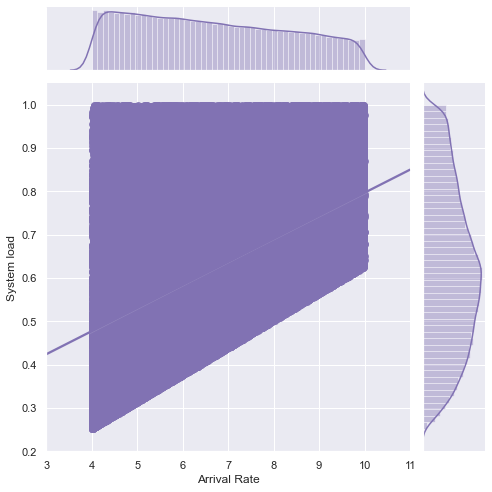

In [22]:
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(0.07, 1),
                  color="m", height=7)
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(0.2, 1.05),
                  color="m", height=7)

### Wpływ tempa obsługi na obciążenie systemu

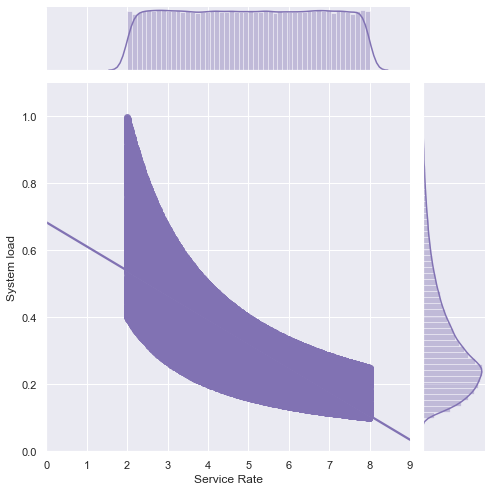

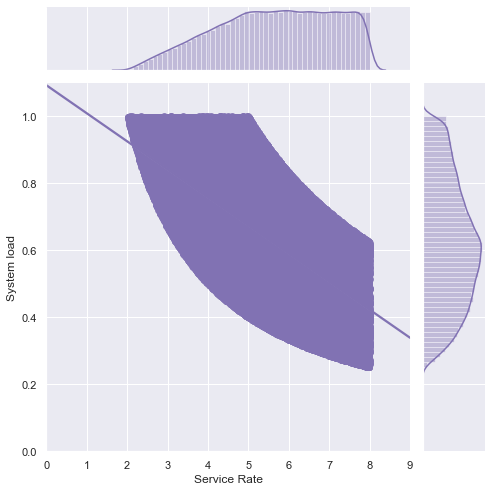

In [28]:
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)

### Wpływ tempa obsługi/napływu na procentową wartość obsłużonych zgłoszeń

Tempo obsługi - procent obsłużonych przy 5 serwerach


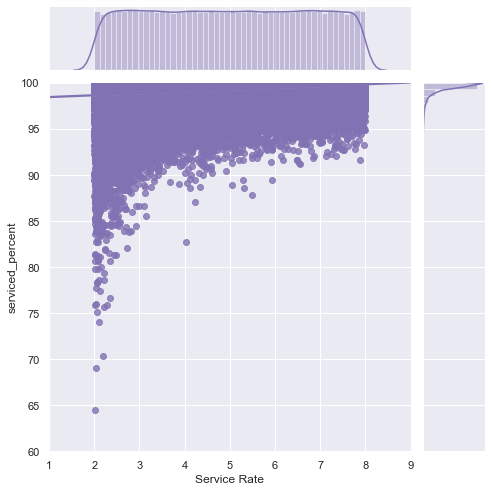

Tempo obsługi - procent obsłużonych przy 2 serwerach


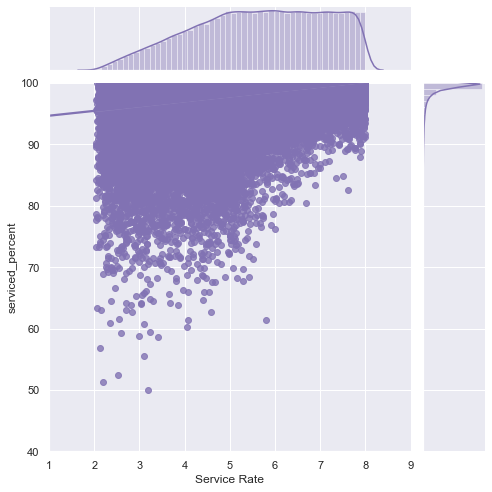

Tempo napływu - procent obsłużonych przy 5 serwerach


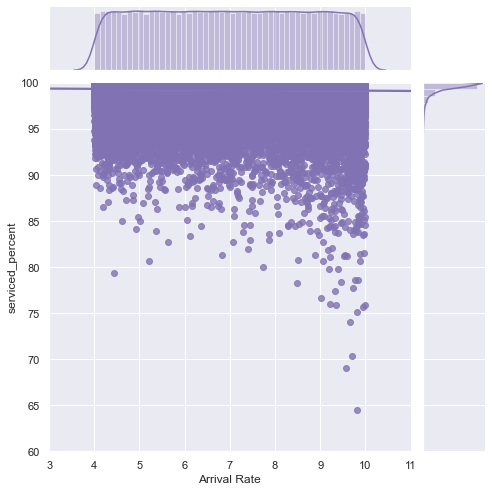

Tempo napływu - procent obsłużonych przy 2 serwerach


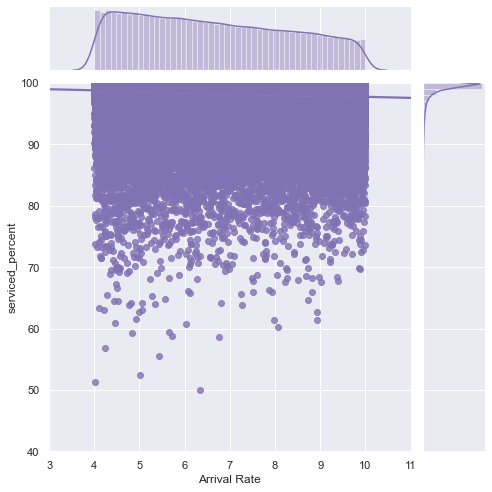

In [37]:
print("Tempo obsługi - procent obsłużonych przy 5 serwerach")
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(1, 9), ylim=(60, 100),
                  color="m", height=7)
plt.show()
print("Tempo obsługi - procent obsłużonych przy 2 serwerach")
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(1, 9), ylim=(40, 100),
                  color="m", height=7)
plt.show()
print("Tempo napływu - procent obsłużonych przy 5 serwerach")
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(60, 100),
                  color="m", height=7)
plt.show()
print("Tempo napływu - procent obsłużonych przy 2 serwerach")
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(40, 100),
                  color="m", height=7)
plt.show()

### Tempo napływu i obsługi a różnice między modelem matematycznym

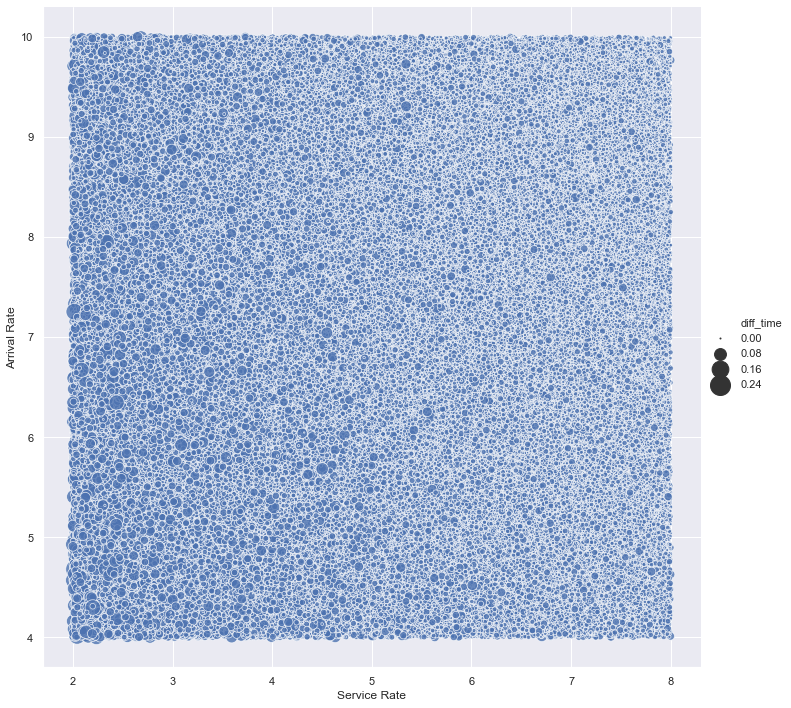

In [42]:
sns.relplot(x="Service Rate", y="Arrival Rate", size="diff_time",
            sizes=(1, 400), alpha=.8,
            height=10, data=df.loc[df['Servers Number'] == 5])

### Współczynnik regresji
Współczynnik regresji zmiennych tempa napływu, tempa obsługi, liczby serwerów do obciążenia systemu.

In [26]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['System load']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do obciążenia systemu")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [-0.07990352  0.05283674 -0.10032704] do obciążenia systemu


In [27]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['serviced_percent']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do % wartości obsłużonych")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [ 0.32815854 -0.09086114  0.27086681] do % wartości obsłużonych
